## Procesamiento de Lenguaje Natural

*Proyecto Final: **Modelado de Tópicos*** 

# ***Análisis exploratorio de datos***

### **Equipo:**

- Giottonini Herrera Enrique Alejandro
- Burruel Durán Luis Andrés
- Villalba Miranda Jesús Abraham
- Oscar

**Fuentes**
* Los datos fueron obtenidos de [@nostradata ](https://www.nostrodata.com) en [`GitHub`](https://github.com/NOSTRODATA/conferencias_matutinas_amlo)
---

In [1]:
# Importamos las librerias que utilizaremos
import os
import re
import spacy
import seaborn as sns
import pandas as pd
import numpy as np
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from matplotlib import pyplot as plt

## **Objetivo**

El propósito es realizar un análisis exploratorio sobre los datos crudos para tener una base en la toma de desiciones con respecto al pre-procesamiento de datos (limpieza, normalización, etc.) para nuestra tarea final, el `modelado de topicos`.

Es importante señalar la estructura de los documentos o datos crudos que estaremos analizando y que formato deseamos como resultado del preprocesamiento para el entrenamiento del modelo que utilizaremos para el modelado de topicos. Los documentos vienen separados en archivos diferentes, en el que cada archivo contiene las mañaneras ocurridas en la semana correspondiente.

Lo que esperamos producir como salida es un archivo `csv` que contenga los **tokens** identificados de la semana despues del preprocesamiento del texto.

### Extracción de información de los archivos

In [ ]:
def getData(filename: str) -> str:
    """ Lee y almacena en un string todos los carácteres leídos en un archivo .txt """
    rawData = ""
    with open(filename, encoding="utf-8") as f:
        for line in f:
            rawData += line
    return rawData

In [ ]:
available_data_paths = os.listdir(path='../data/')

Para la tarea que estamos resolviendo consideramos pertinente analizar nuestro corpus realizando un preprocesamiento sencillo de convertir todos nuestros caracteres alfanumericos a minusculas.

In [ ]:
df = pd.DataFrame(columns=['text', 'week'])
for file_name in available_data_paths:
    df.loc[len(df)] = [getData(f'../data/{file_name}').lower(), file_name]

In [ ]:
df.shape

(219, 2)

## Estadisticas simples

En esta sección analizaremos información basica de nuestros documentos, como la cantidad de palabras por documento, cantidad de sentencias por documento, etc. 

In [ ]:
eda_df = df.copy()
eda_df['words'] = df['text'].apply(lambda x: word_tokenize(x, 'spanish'))
eda_df['sentences'] = df['text'].apply(lambda x: sent_tokenize(x, 'spanish'))
eda_df['num_ch'] = df['text'].apply(lambda x: len(x))

In [ ]:
eda_df.head()

,text,week,words,sentences,num_ch
0,"buenos días. bueno, iniciamos la semana como ...",01-03-2021.txt,"[buenos, días, ., bueno, ,, iniciamos, la, sem...","[ buenos días., bueno, iniciamos la semana com...",339982
1,"buenos días. ánimo, estamos iniciando la sema...",01-04-2019.txt,"[buenos, días, ., ánimo, ,, estamos, iniciando...","[ buenos días., ánimo, estamos iniciando la se...",230930
2,"buenos días. el día de hoy aquí, en quintana ...",01-06-2020.txt,"[buenos, días, ., el, día, de, hoy, aquí, ,, e...","[ buenos días., el día de hoy aquí, en quintan...",157919
3,buenos días. es una semana que estamos inicia...,01-07-2019.txt,"[buenos, días, ., es, una, semana, que, estamo...","[ buenos días., es una semana que estamos inic...",105377
4,"buenos días. ánimo, ánimo, estamos comenzando...",01-08-2022.txt,"[buenos, días, ., ánimo, ,, ánimo, ,, estamos,...","[ buenos días., ánimo, ánimo, estamos comenzan...",282200


#### Número de caracteres por documento (semana)

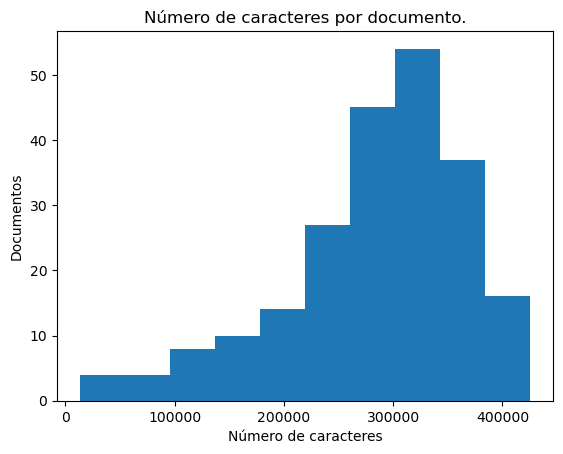

In [8]:
plt.hist(eda_df['num_ch'])
plt.title('Número de caracteres por documento.')
plt.xlabel('Número de caracteres')
plt.ylabel('Documentos')
plt.show()

#### Número de palabras por semana.

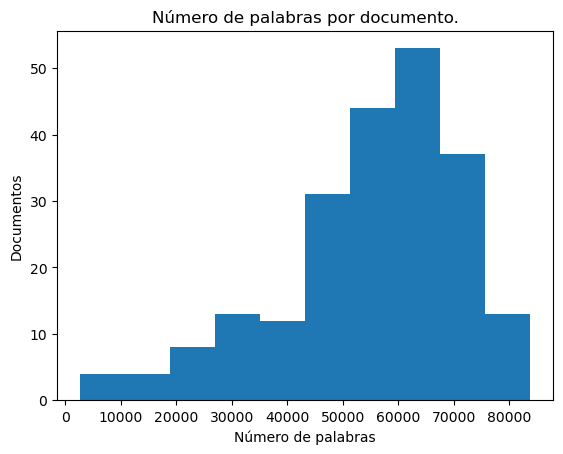

In [9]:
plt.hist(eda_df['words'].apply(lambda x: len(x)))
plt.title('Número de palabras por documento.')
plt.xlabel('Número de palabras')
plt.ylabel('Documentos')
plt.show()

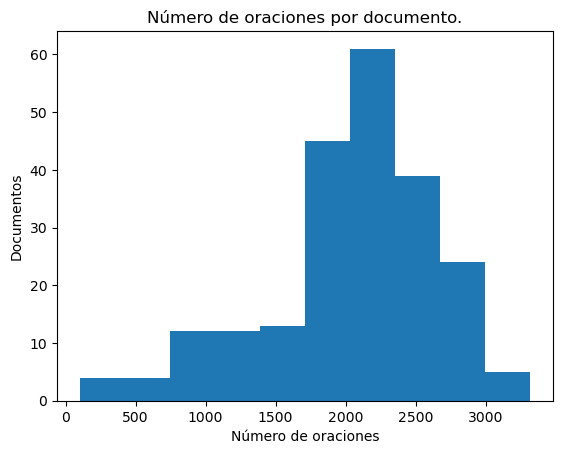

In [10]:
plt.hist(eda_df['sentences'].apply(lambda x: len(x)))
plt.title('Número de oraciones por documento.')
plt.xlabel('Número de oraciones')
plt.ylabel('Documentos')
plt.show()

#### Longitud promedio de palabras por documento.

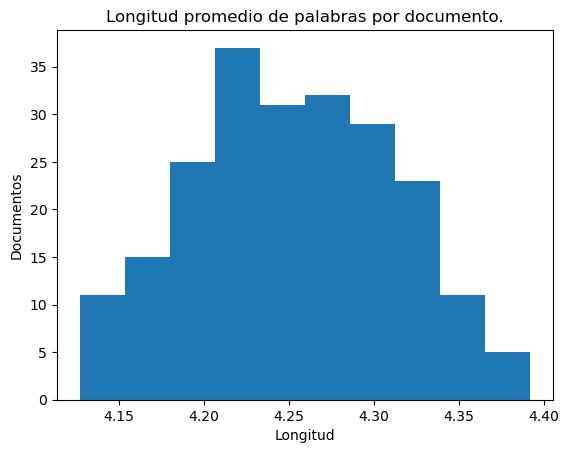

In [11]:
plt.hist(eda_df['words'].apply(lambda x: np.mean([len(i) for i in x])))
plt.title('Longitud promedio de palabras por documento.')
plt.xlabel('Longitud')
plt.ylabel('Documentos')
plt.show()

## Palabras más repetidas.

Para realizar este analisis y considerando la tarea que queremos realizar, consideramos pertinente realizar un preprocesamiento basico de nuestro corpus antes de obtener las palabras más repetidas de nuestro corpus. 

El preprocesamiento que consideramos pertinente es:
 * Quedarnos solamente con caracteres alfanumericos.
 * Remover `stopwords`.

In [12]:
stop_words = stopwords.words('spanish')

In [13]:
clean_word = lambda word: re.sub(r'[^a-záíóúéñ]',"",word)

def basic_preprocessing(text: str) -> str:
    text = text.strip()
    tokens = word_tokenize(text)
    tokens = [clean_word(word) for word in tokens if clean_word(word)] 
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [14]:
eda_df['clean'] =  eda_df['text'].apply(basic_preprocessing)
print(eda_df[['clean']].head())

                                               clean
0  buenos días bueno iniciamos semana siempre lun...
1  buenos días ánimo iniciando semana veracruz hi...
2  buenos días día hoy aquí quintana roo territor...
3  buenos días semana iniciando ayer pudo tener c...
4  buenos días ánimo ánimo comenzando semana lune...


In [15]:
vocab = defaultdict(int)

In [16]:
for text in eda_df['clean']:
    for word in word_tokenize(text): 
        vocab[word] += 1

Ahora que tenemos nuestro vocabulario, lo que haremos será ordenarlo de manera decresiente para obtener los tokens más frecuentes.

In [17]:
s_vocab = sorted(vocab.items(), key = lambda x: x[1], reverse = True)

In [18]:
limit = 20

In [19]:
words, freq = [], []
for word, f in s_vocab[:limit]:
    words.append(word)
    freq.append(f)

[Text(0.5, 1.0, 'Palabras más frecuentes dentro del corpus')]

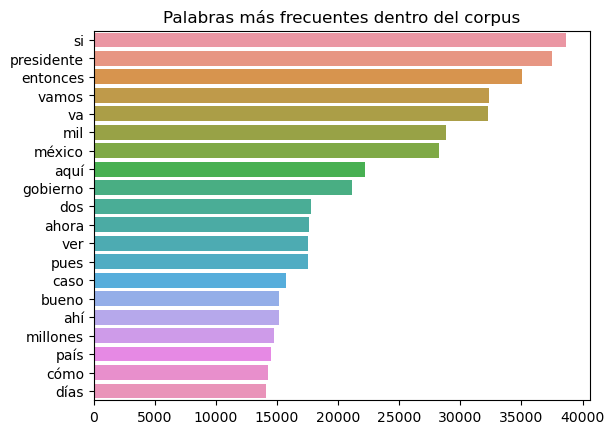

In [20]:
sns.barplot(x=freq, y=words).set(title="Palabras más frecuentes dentro del corpus")

## POS Tagging y lematización.

In [21]:
nlp = spacy.load('es_core_news_sm')

In [22]:
proc = nlp.pipe(eda_df['clean'], n_process=2, batch_size=16)

In [23]:
type(proc)

generator

In [24]:
aux = []
for doc in proc:
    lemmas = [token.lemma_ for token in doc]
    aux.append(" ".join(lemmas))

In [25]:
aux[0]

'buen día bueno iniceír semana siempre lunes informe ricardo sheffield quién quién precio combustibl ir informar acerca adhesión gobernador convocatorio fortalecer democracia país acuerdo favor democracia mira elección gobernador adherido importante luego ir hablar tema comenzar ricardo luego ir video posteriormente dar conocer gobernador manifestado participar acuerdo favor democracia ricardo sheffield padilla procurador federal consumidor mucho gracia señor presidente buen día todo tú quién quién precio combustibl gasolina regular litro veracruz veracruz combustibl bp margen tres pesos centavo fijar uno cuadrita municipio conurbado boca río pesos centavo litro margen centavo franquicia pemex importancia usar app litro litro desplazar él uno cuanta cuadra poder encontrar opción económico caso poder ver gran diferencia precisamente margen cada gasolinera hablar margen cuatro peso centavo margen shell naucalpan méxico gasolín premium alto octanaje precio público pesos centavo mientras c

In [26]:
eda_df['clean'].loc[0]

'buenos días bueno iniciamos semana siempre lunes informe ricardo sheffield quién quién precios combustibles vamos informar acerca adhesión gobernadores convocatoria fortalecer democracia país acuerdo favor democracia miras elecciones gobernadores adherido importante luego vamos hablar tema comenzamos ricardo luego vamos videos posteriormente damos conocer gobernadores manifestado participar acuerdo favor democracia ricardo sheffield padilla procurador federal consumidor muchas gracias señor presidente buenos días todas ustedes quién quién precios combustibles gasolina regular litro veracruz veracruz combustibles bp margen tres pesos centavos fijen unas cuadritas municipio conurbado boca río pesos centavos litro margen centavos franquicia pemex importancia usar app litro litro desplazándose unas cuantas cuadras pueden encontrar opciones económicas caso pueden ver gran diferencia precisamente margen cada gasolineras hablando margen cuatro pesos centavos margen shell naucalpan méxico gas

In [27]:
eda_df['text'].loc[0]

' buenos días. bueno, iniciamos la semana como siempre, los lunes, con el informe de ricardo sheffield sobre quién es quién en los precios de los combustibles. también vamos a informar acerca de la adhesión de muchos gobernadores a la convocatoria para fortalecer la democracia en nuestro país, un acuerdo en favor de la democracia con miras a las elecciones. ya muchos gobernadores se han adherido y esto es muy importante, luego vamos a hablar de este tema. pero comenzamos con ricardo, luego vamos con los videos y posteriormente damos a conocer qué gobernadores han manifestado participar en este acuerdo en favor de la democracia. ricardo sheffield padilla, procurador federal del consumidor: muchas gracias, señor presidente. muy buenos días a todas y a todos ustedes. quién es quién en los precios de los combustibles. tenemos la gasolina regular a 21.46 por litro en veracruz, veracruz, en combustibles bp, con un margen de tres pesos 58 centavos; y nada más para que se fijen, a unas cuadrit

In [ ]:
clean_word_2 = lambda word: re.sub(r'[^a-záíóúéñ]',"",word)

In [ ]:
clean_word_2('Construcción')

In [ ]:
' '.join([f"{clean_word(word)}:{word}" for word in word_tokenize(eda_df['text'].loc[0]) if clean_word(word)])

In [29]:
aux = []
for doc in nlp.pipe(eda_df['clean'].loc[:50]):
    lemmas = [token.lemma_ for token in doc]
    aux.append(" ".join(lemmas))

MemoryError: Unable to allocate 1.12 GiB for an array with shape (1042275, 288) and data type float32

In [ ]:
aux[0]

In [ ]:
basic_preprocessing(eda_df['text'].loc[0])